# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

https://wiki.csc.calpoly.edu/datasets/wiki/Houses

To make it simpler for this assignment, the dataset has been slightly modified.  It contains the following fields:

1.	MLS: Multiple listing service number for the house (unique ID).
2.	Price: the most recent listing price of the house (in dollars).
3.	Bedrooms: number of bedrooms.
4.	Bathrooms: number of bathrooms.
5.	Size: size of the house in square feet.
6.	Price/SQ.ft: price of the house per square foot.

The model predict the housing price given the square footage of the house.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head(10)

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99
5,136431,324900,3,3,1800,180.50
6,137036,192900,4,2,1603,120.34
7,137090,215000,3,2,1450,148.28
8,137159,999000,4,3,3360,297.32
9,137570,319000,3,2,1323,241.12


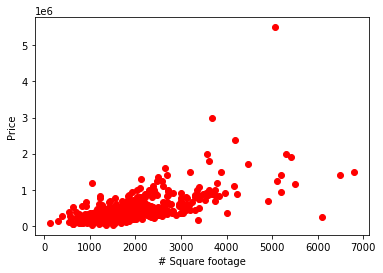

In [3]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values) 

X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

#plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [4]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Perform gradient descent

In [5]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.01

N = len(y)

# Number of epochs
MAX_EPOCHS = 2000

mse_array = []  

# Loop for 2000 epochs
for itr in range (0, MAX_EPOCHS):
    # X_train is 781x1 and y_train is 781x1
    x = X_train.reshape(781,1)
    y = y_train.reshape(781,1)

    W0 = (np.matlib.repmat(w0,len(X),1))
    W1 = (np.matlib.repmat(w1,len(X),1))

    dw0 = (1/N)*(np.sum(W0 + W1*x - y))
    dw1 = (1/N)*(np.sum((W0 + W1*x - y)*x))
  
    # [TO DO]: write update equation
    w0 = w0 - nu*dw0
    w1 = w1 - nu*dw1

    W0 = (np.matlib.repmat(w0,len(X),1))
    W1 = (np.matlib.repmat(w1,len(X),1))

    # [TO DO]: compute mse
    mse = (1/(2*N))*np.sum((W0 + W1*x - y)**2)
    mse_array.append(mse)

    #print(mse)

In [6]:
### IMPORTANT ###
## If non-vectorized, then need to form w
w = np.array([w0,w1])

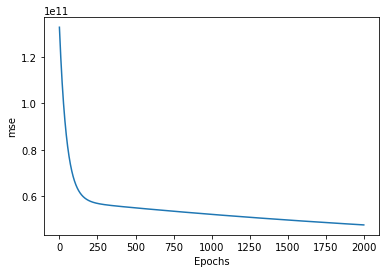

In [7]:
### Plot mse vs iterations
plt.plot(mse_array)  #
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

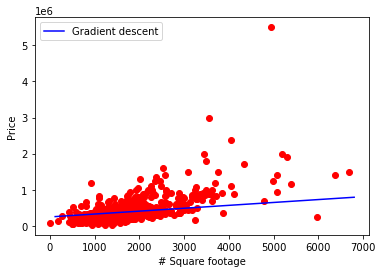

In [8]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()


In [9]:
### Print the weight vector w
print (w)

[[257032.99535752]
 [535468.30618548]]


In [80]:
### Predict the price of a 5000 sqft house
### Remember to normalize it first
size = 5000
size_normalized = (size - Xmin)/max_min
y_pred = w0 + w1*[size_normalized]

print(y_pred)


[[648213.4346068]]
